<a href="https://colab.research.google.com/github/fernandosagastume/SPLABS/blob/master/Laboratorio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Nombre: Fernando José Sagastume Cerna 
#Carnet: 17004989
#Sección: A
#Seminario Profesional 1 
#Laboratorio 4
#----------------------------------------------------------------------------------------------
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

#Para hacer split de la data
from sklearn.model_selection import train_test_split

import os
import numpy as np
import PIL.Image as Image
import matplotlib.pylab as plt

seed=1234
np.random.seed(seed)
tf.random.set_seed(seed)

In [0]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [74]:
CLASS_NAMES = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
print('train_images shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

train_images shape: (60000, 28, 28)
60000 train samples
10000 test samples


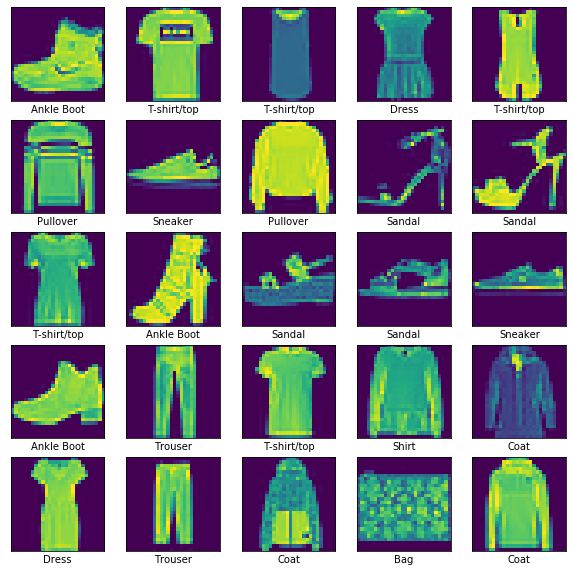

In [75]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(CLASS_NAMES[train_labels[i]])
plt.show()

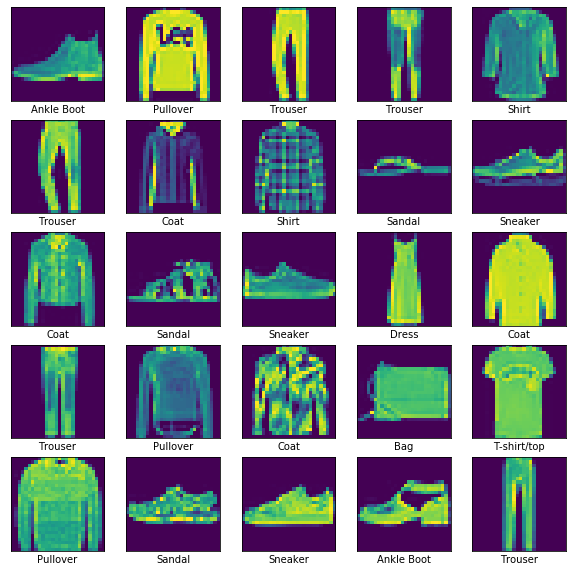

In [76]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(CLASS_NAMES[test_labels[i]])
plt.show()

In [77]:
#Se hace preprocesamiento de la data y one hot encoding 
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_images.shape, test_images.shape, train_labels.shape, test_labels.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10), (10000, 10))

In [78]:
#Se normalizan los valores de los pixeles
train_images = train_images/255.0
test_images = test_images/255.0

train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [79]:
#Se hace split a la data con el fin de obtener validation images
train_images, validation_images, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size=0.3)
validation_images.shape, validation_labels.shape

((18000, 28, 28, 1), (18000, 10))

In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [81]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [82]:
history = model.fit(train_images, 
                        train_labels,
                        batch_size=128,
                        epochs=15,
                        validation_data=(validation_images, validation_labels))


Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 38s 900us/sample - loss: 0.6155 - accuracy: 0.7795 - val_loss: 0.4236 - val_accuracy: 0.8457
Epoch 2/15
42000/42000 [==============================] - 37s 887us/sample - loss: 0.3715 - accuracy: 0.8646 - val_loss: 0.3533 - val_accuracy: 0.8731
Epoch 3/15
42000/42000 [==============================] - 37s 892us/sample - loss: 0.3204 - accuracy: 0.8824 - val_loss: 0.3220 - val_accuracy: 0.8829
Epoch 4/15
42000/42000 [==============================] - 37s 878us/sample - loss: 0.2852 - accuracy: 0.8949 - val_loss: 0.2956 - val_accuracy: 0.8892
Epoch 5/15
42000/42000 [==============================] - 37s 887us/sample - loss: 0.2583 - accuracy: 0.9047 - val_loss: 0.2792 - val_accuracy: 0.8981
Epoch 6/15
42000/42000 [==============================] - 37s 882us/sample - loss: 0.2438 - accuracy: 0.9103 - val_loss: 0.2720 - val_accuracy: 0.9004
Epoch 7/15
42000/42000 [====================

In [83]:
results = model.evaluate(test_images, test_labels)
print('Test loss:', results[0])
print('Test accuracy:', results[1])

10000/10000 [==============================] - 3s 342us/sample - loss: 0.2759 - accuracy: 0.9107
Test loss: 0.2758695305079222
Test accuracy: 0.9107


In [0]:
def plot_accuracy_and_loss(history, acc_ylim=[min(plt.ylim()),1.0], loss_ylim=[0,2.0]):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc, label='Training Accuracy')
  plt.plot(val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim(acc_ylim)
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Training Loss')
  plt.plot(val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim(loss_ylim)
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

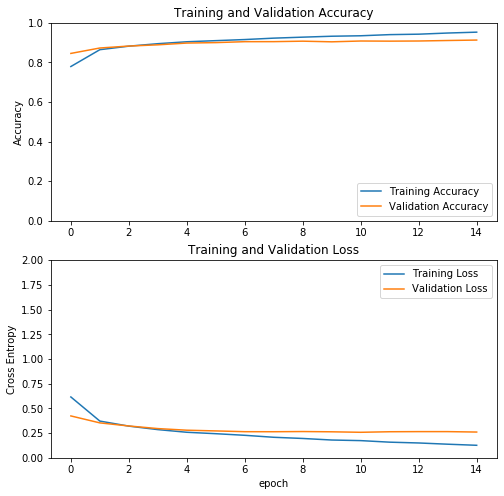

In [85]:
plot_accuracy_and_loss(history)